In [1]:
!pip install numpy 
!pip install pandas 
!pip install opencv-python
!pip install matplotlib

^C
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/bin/pip", line 11, in <module>
    sys.exit(main())
             ^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/main.py", line 77, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/anaconda3/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<froz

In [2]:
import warnings
warnings.simplefilter('ignore')

In [8]:
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('car_camera_photos/labels_train.csv')
df

frame  xmin  xmax  ymin  ymax  class_id
0       1478019952686311006.jpg   237   251   143   155         1
1       1478019952686311006.jpg   437   454   120   186         3
2       1478019953180167674.jpg   218   231   146   158         1
3       1478019953689774621.jpg   171   182   141   154         2
4       1478019953689774621.jpg   179   191   144   155         1
...                         ...   ...   ...   ...   ...       ...
132401  1479506176491553178.jpg   166   186   139   156         1
132402  1479506176491553178.jpg   182   204   142   153         1
132403  1479506176491553178.jpg   239   261   139   155         1
132404  1479506176491553178.jpg   259   280   139   157         1
132405  1479506176491553178.jpg   284   324   137   168         1

[132406 rows x 6 columns]

In [5]:
lst = []
columns=df.columns
for column in columns:
    dtypes = df[column].dtypes
    nunique = df[column].nunique()
    isnullsum = df[column].isnull().sum()
    lst.append([column,dtypes,nunique, isnullsum])
df_stat = pd.DataFrame(lst, columns=['column', 'dtypes', 'nunique', 'isnullsum'])
df_stat

column  dtypes  nunique  isnullsum
0     frame  object    18000          0
1      xmin   int64      476          0
2      xmax   int64      477          0
3      ymin   int64      207          0
4      ymax   int64      285          0
5  class_id   int64        5          0

In [6]:
classes = df.class_id.unique().tolist()
classes

[1, 3, 2, 5, 4]

In [10]:
boxes = {}
images = {}
img_path = 'car_camera_photos/images/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[(random.randint(2, 21))]
    
    images[class_id] = cv2.imread(imgs_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'], first_row['xmax'], first_row['ymin'], first_row['ymax']]

In [11]:
labels = {1: 'Car', 2: 'Truck', 3: 'Pedestrian', 4: 'Bicycle', 5: 'Traffic Light'}

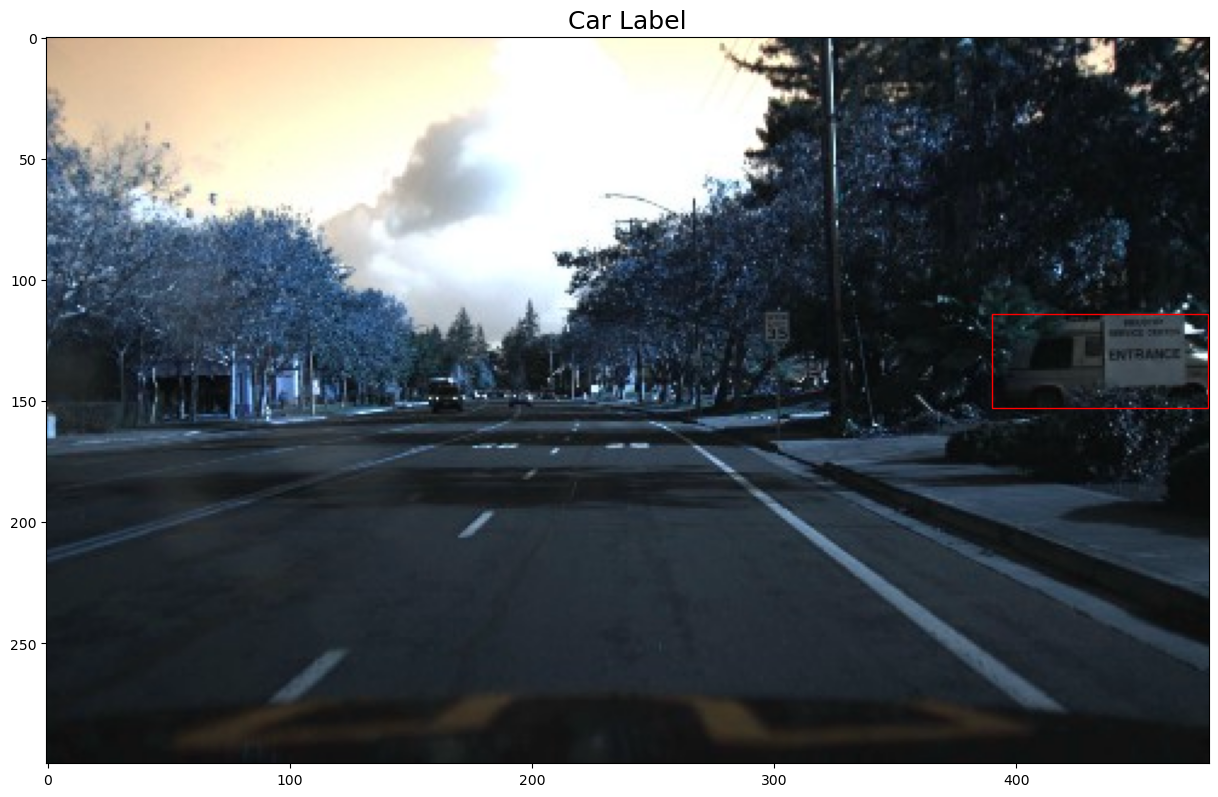

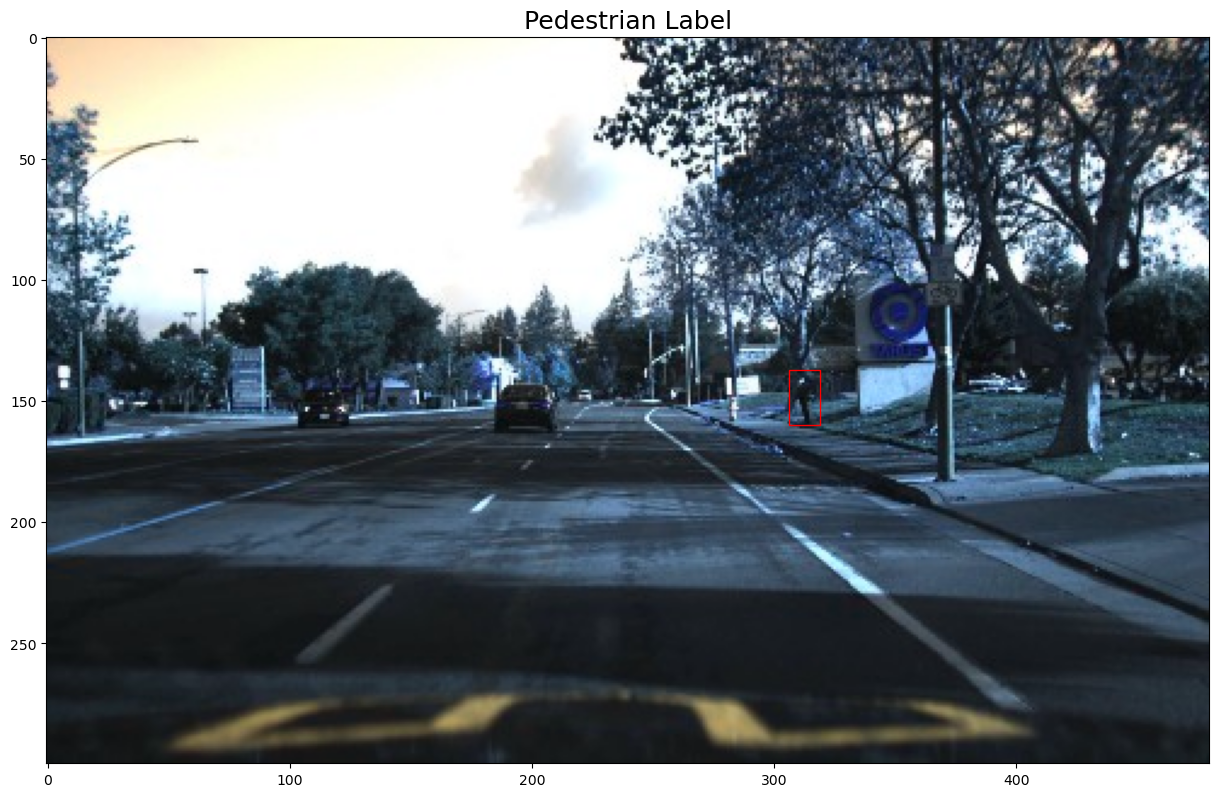

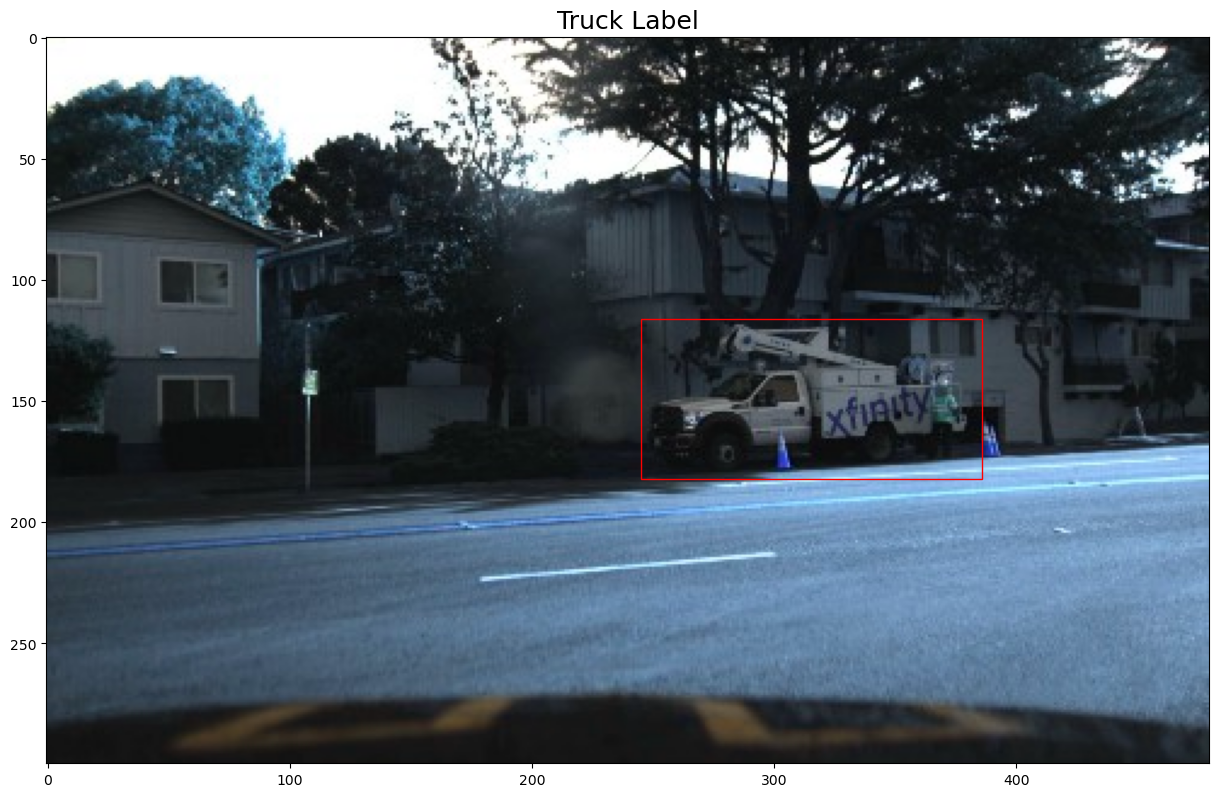

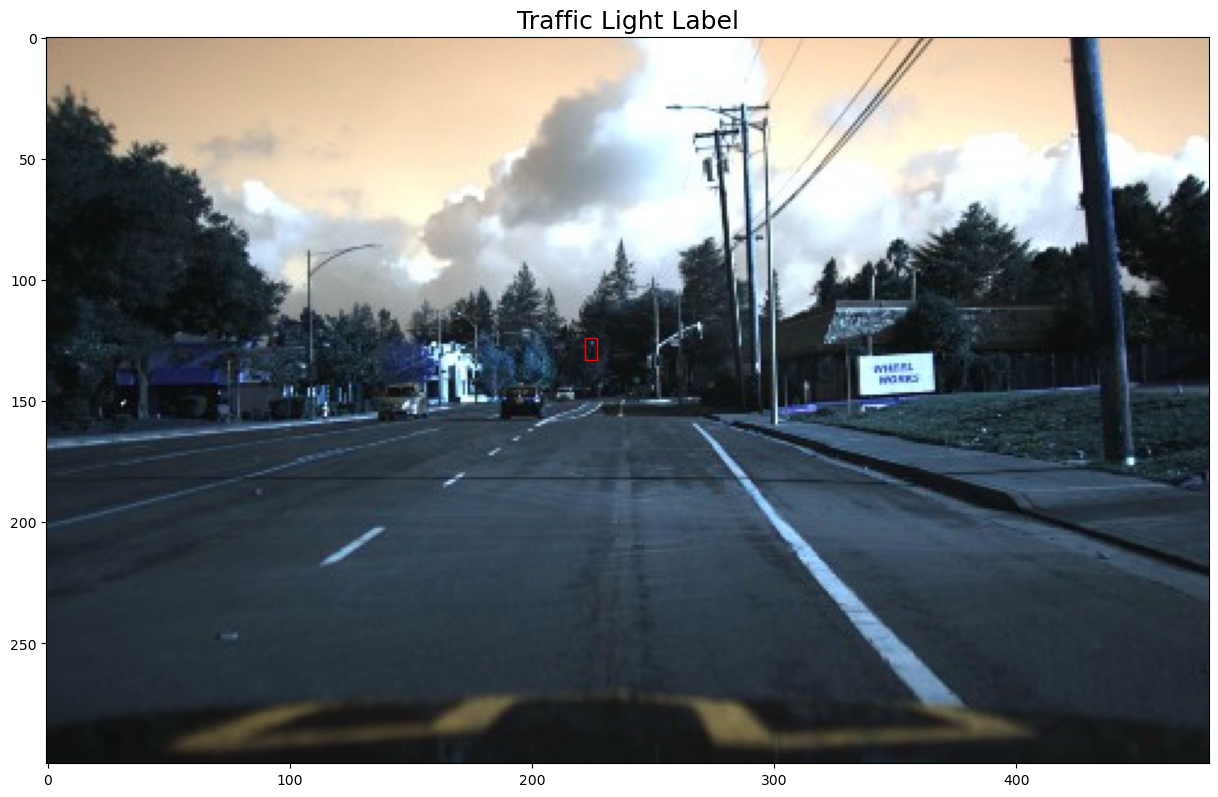

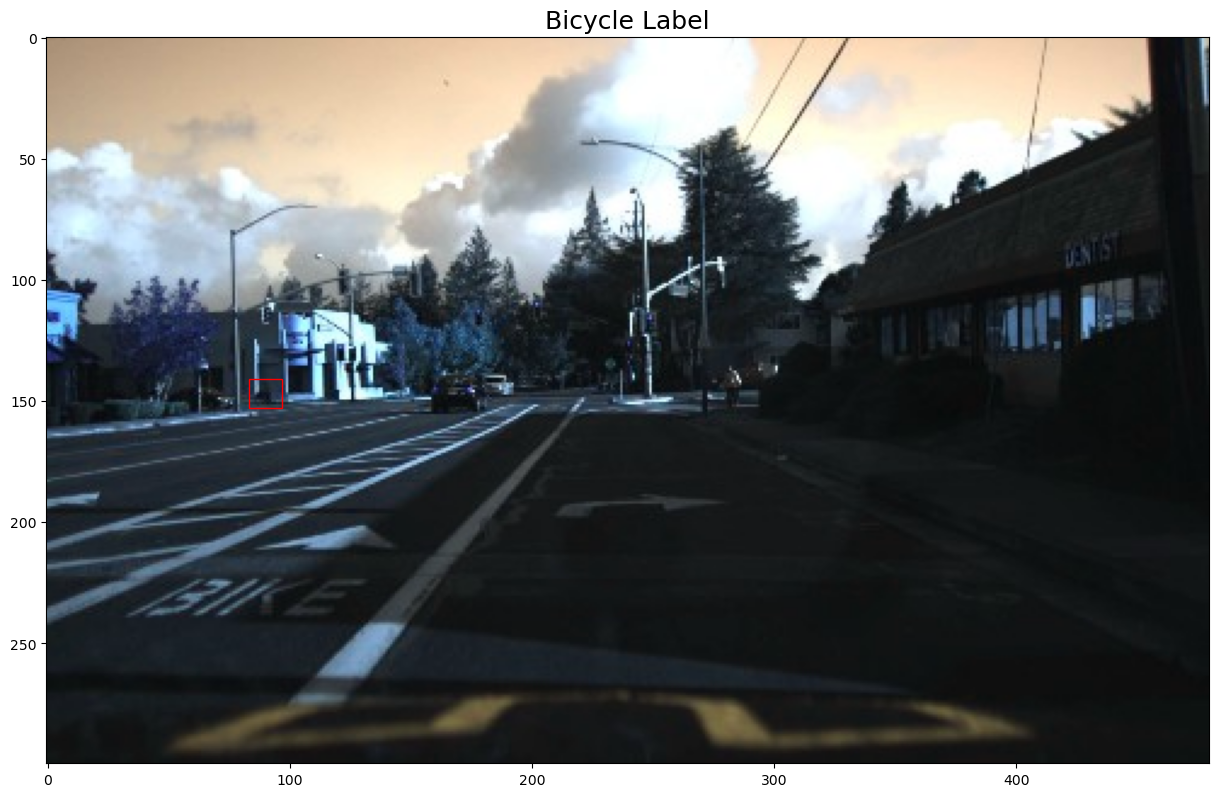

In [12]:
for class_id in classes:
    xmin, xmax, ymin, ymax = boxes[class_id][0], boxes[class_id][1], boxes[class_id][2], boxes[class_id][3]
    plt.figure(figsize=(15, 20))
    plt.title(labels[class_id] + " Label" ,fontsize=18)
    plt.imshow(images[class_id])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='red', fill=False, linewidth=1))
    plt.show()